In [1]:
!pip install pystan==2.19.1.1 
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536047 sha256=6e7f565410255fcab6b1c7528c4774fb0a702a7accd033e7329943e357aaabb5
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdsta

In [2]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [17]:
avocado = pd.read_csv('/content/avocado.csv')
avocado.head() # averagePrice를 예측! 어떤 컬럼이 y에 영향을 미칠지 생각해보고, 시각화 해보고.. 잘 찾아보기 / 잘 예측해보기!

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [19]:
len(avocado)

18249

In [82]:
avocado.value_counts('region')

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [20]:
avocado_df = avocado[['Date', 'AveragePrice']]

In [21]:
# step1 - ds, y로 컬럼명 변경하기
avocado_df.columns = ['ds', 'y']
avocado_df.head()

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


In [22]:
# step2 - 날짜 정보를 가지는 컬럼을 datetime 자료형으로 변경
avocado_df['ds'] = pd.to_datetime(avocado_df['ds'])
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      18249 non-null  datetime64[ns]
 1   y       18249 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 285.3 KB


<ipython-input-22-c857f20812e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_df['ds'] = pd.to_datetime(avocado_df['ds'])


In [26]:
# 날짜순으로 정렬 >> 날짜순으로 정렬하면 더 예측하기 좀 그런가..? 상관없나? 시계열.. 시간 지남에 따라.. 근데 아닌거같다 이 접근이..흠
avocado_df.sort_values(by='ds', inplace = True)
avocado_df.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ds,y
11569,2015-01-04,1.75
11829,2015-01-04,1.46
11777,2015-01-04,1.70
675,2015-01-04,0.99
1247,2015-01-04,0.92


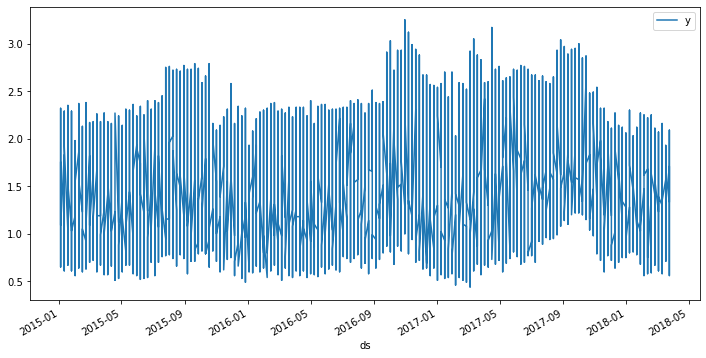

In [27]:
avocado_df.plot(x = 'ds', y = 'y', figsize=(12,6))

In [28]:
len(avocado_df)

18249

In [29]:
# train, test data 분리
train = avocado_df.iloc[:15000]
test = avocado_df.iloc[15000:]

In [37]:
train.head()

,ds,y
11569,2015-01-04,1.75
11829,2015-01-04,1.46
11777,2015-01-04,1.70
675,2015-01-04,0.99
1247,2015-01-04,0.92


In [31]:
test.head()

,ds,y
17091,2017-08-27,2.03
15289,2017-08-27,1.87
16031,2017-08-27,1.55
8390,2017-08-27,1.31
6694,2017-08-27,1.63


In [61]:
# step3 - 모델 학습
m = Prophet(seasonality_mode='multiplicative') 
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
# step4 - \make future dataframe
future = m.make_future_dataframe(periods = 7, freq='D') # periods의 정확한 의미를 모르겠음 
future

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
141,2017-08-30
142,2017-08-31
143,2017-09-01
144,2017-09-02


In [71]:
# step5 - 예측
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.369342,0.890699,1.884056
1,2015-01-11,1.372126,0.881164,1.851134
2,2015-01-18,1.367542,0.885829,1.838133
3,2015-01-25,1.343412,0.852225,1.869102
4,2015-02-01,1.310623,0.851935,1.807946
...,...,...,...,...
141,2017-08-30,1.697842,1.164958,2.192258
142,2017-08-31,1.695875,1.211743,2.173720
143,2017-09-01,1.694165,1.152864,2.206240
144,2017-09-02,1.692805,1.218832,2.207901


In [67]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2015-01-04,1.482056,0.889116,1.848550,1.482056,1.482056,-0.076052,-0.076052,-0.076052,-0.076052,-0.076052,-0.076052,0.0,0.0,0.0,1.369342
1,2015-01-11,1.477932,0.866880,1.880282,1.477932,1.477932,-0.071590,-0.071590,-0.071590,-0.071590,-0.071590,-0.071590,0.0,0.0,0.0,1.372126
2,2015-01-18,1.473807,0.874850,1.844573,1.473807,1.473807,-0.072102,-0.072102,-0.072102,-0.072102,-0.072102,-0.072102,0.0,0.0,0.0,1.367542
3,2015-01-25,1.469682,0.838109,1.858679,1.469682,1.469682,-0.085917,-0.085917,-0.085917,-0.085917,-0.085917,-0.085917,0.0,0.0,0.0,1.343412
4,2015-02-01,1.465557,0.811128,1.785180,1.465557,1.465557,-0.105717,-0.105717,-0.105717,-0.105717,-0.105717,-0.105717,0.0,0.0,0.0,1.310623


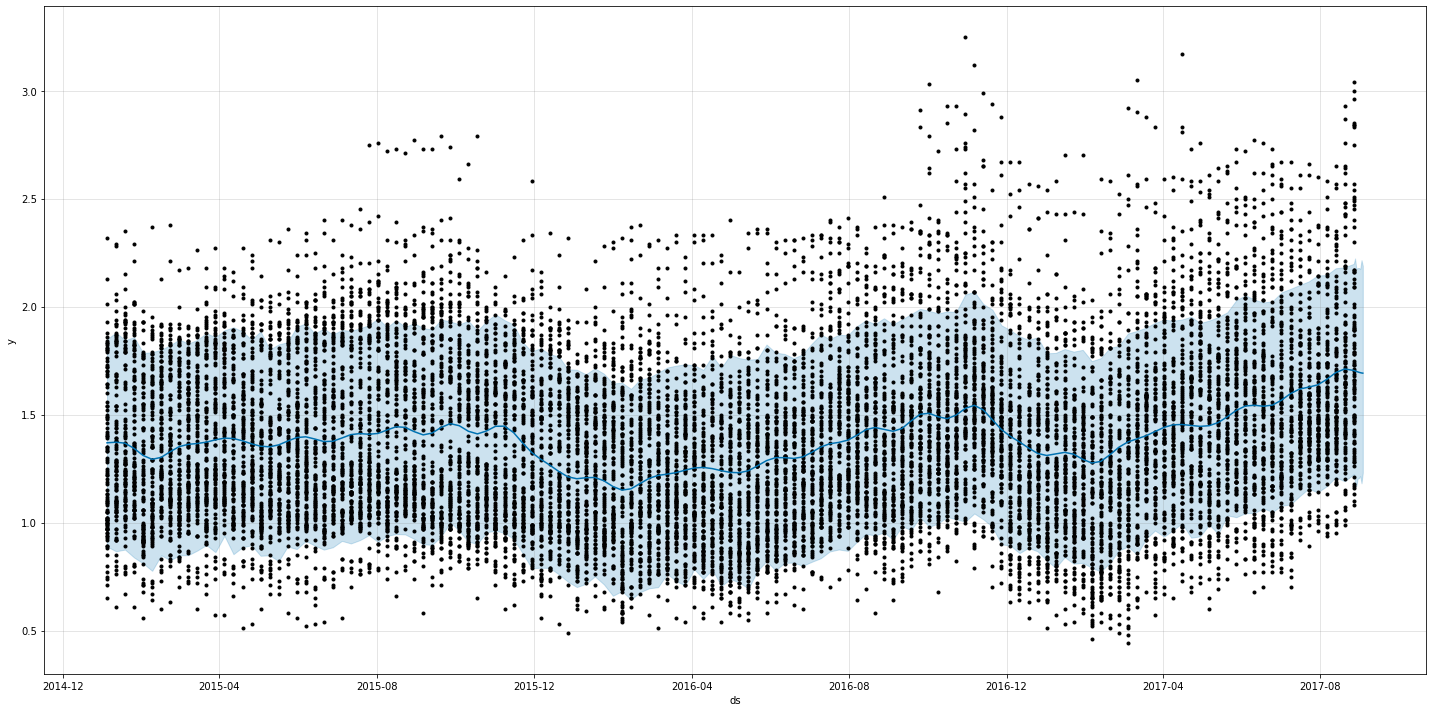

In [68]:
# step6 - 시각화
m.plot(forecast, figsize=(20,10));

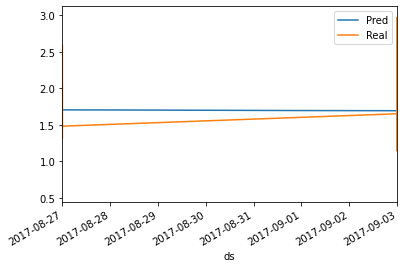

In [73]:
ax = forecast.plot(x = 'ds', y = 'yhat', label = 'Pred') 
test.plot(x = 'ds', y = 'y', label = 'Real', ax=ax, xlim=['2017-08-27', '2017-09-03'])

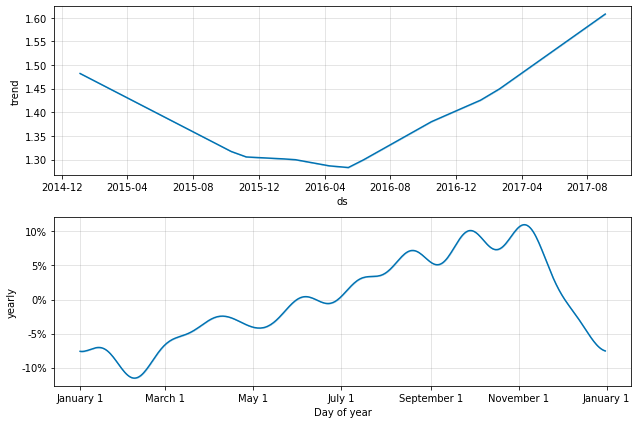

In [74]:
m.plot_components(forecast); # 10,11월에 아보카도 가격이 피크라는 인사이트 얻을 수있음... / 트렌드.. 16년까지 내려갔다가 또 올랐다는 의미..

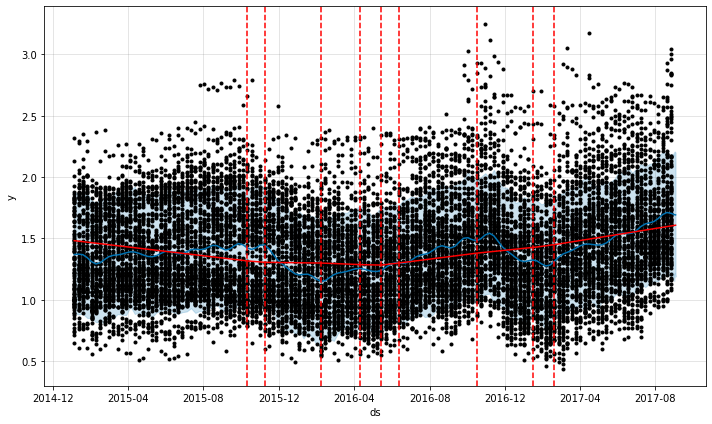

In [76]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# 평가

In [77]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [79]:
df_cv = cross_validation(m, initial = f'{7 * 10} days', period = f'{7 * 10} days', horizon = f'{7 * 2} days') 
df_cv

INFO:fbprophet:Making 13 forecasts with cutoffs between 2015-04-26 00:00:00 and 2017-08-13 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-05-03,1.358974,0.920530,1.805888,1.55,2015-04-26
1,2015-05-03,1.358974,0.932609,1.799747,1.55,2015-04-26
2,2015-05-03,1.358974,0.917900,1.796629,1.02,2015-04-26
3,2015-05-03,1.358974,0.920860,1.806182,1.48,2015-04-26
4,2015-05-03,1.358974,0.949369,1.791323,0.74,2015-04-26
...,...,...,...,...,...,...
2792,2017-08-27,1.636605,1.149246,2.136023,1.66,2017-08-13
2793,2017-08-27,1.636605,1.122750,2.093203,2.17,2017-08-13
2794,2017-08-27,1.636605,1.149830,2.131544,1.68,2017-08-13
2795,2017-08-27,1.636605,1.113351,2.113282,1.58,2017-08-13


In [80]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,0.162407,0.402997,0.325304,0.256455,0.218691,0.748575
1,14 days,0.169738,0.411993,0.323525,0.243631,0.206502,0.766691


/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


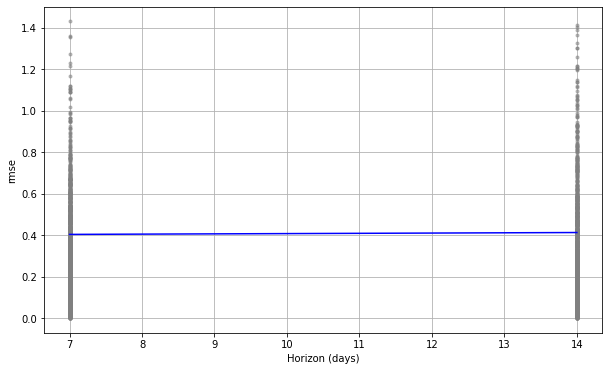

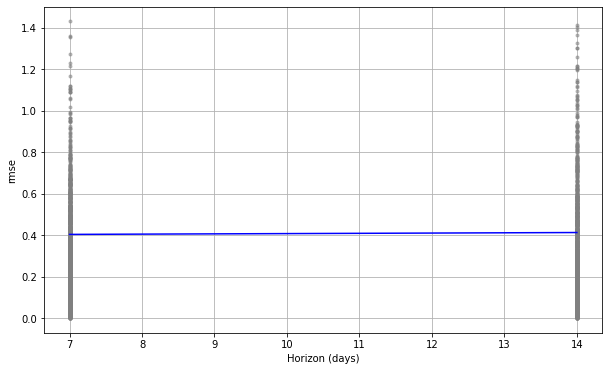

In [81]:
plot_cross_validation_metric(df_cv, metric = 'rmse')

<강사님 코드 보면서 배운거>
- 연속형 데이터 분포가 어떻고, 범주형 데이터에 따라서 연속형 범수가 어떻게 변하는지를 보면 됨!!! 이걸 보는게 중요! > type, year, region에 따라 가격 변화 차이가 있나? 
- 범주형이 뭐가 있나 보기! >> 범주형은 살펴보기
- 시계열은 데이터가 별로 없기 때문에 'year'같은 컬럼있으면 최대한 많이 쓰는게 좋음!
- Date는 하나가 들어가야 됨!(그 날짜에 따른 가격을 보는거니까) > type이나 region에 따라서... 봐도..
- Date... 평균 써도 되는지? 이 기준 알려면? >> 분산, 표준편차 작아야됨... 그래야 의미가 있음. ... 최대, 최소, 평균을 시각화해서.. 내가 안심하고 평균을 활용할 수 있을지 한번 더 검증!!!
- avocado.resample('W').max() > avocado.set_index('Date') > to_datetime(시간자료형으로 인지를 못해서 위크로 빼지 못하는거임!)(에러보면서 해결해나가기!!!)
- 여기서 우리에게 필요한건 [['AveragePrice']]
- price.columns = [] >> 이중컬럼을 일중컬럼으로 바꿈
- 원래 머신러닝.. 거의 7:3, 8:2 인데.. 1년 주기성 가지니까 1년(52주)주기로 학습 다 해주는게 좋긴해서.. 일단 그렇게 하심! >> 결과 너무 안좋으면 줄일수도 있다!(train data 적으면 >> underfittng될 수 있음)
- forecast는 trend(빨간), yhat(파랑), yhatlower,yhatupper, 실제값(검은점)이 그려진거임!

- time series prediction method >> 3가지(딥러닝을 활용해서 하는건 2월말쯤 딥러닝 배울때!! 할거임!)

In [83]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [84]:
avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [86]:
avocado['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

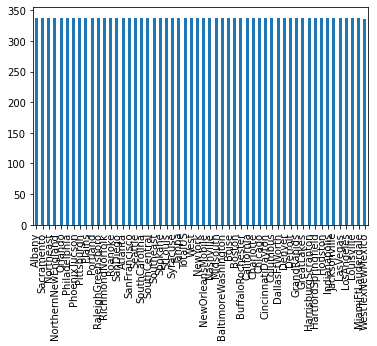

In [85]:
avocado['region'].value_counts().plot.bar() 

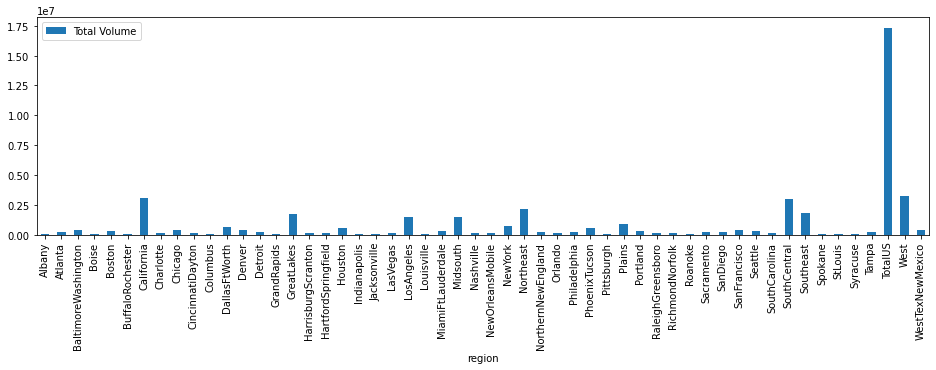

In [88]:
avocado.groupby('region').mean()[['Total Volume']].plot.bar(figsize=(16,4)) # 지역별로 보려면 > groupby / 판매량의 경우는 편차 심함 >> 이럴땐 파이 그래프가 나을듯!

In [89]:
avocado.groupby('region').mean()[['Total Volume']].plot.pie(figsize=(16,4))

ValueError: ignored